In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Tuple

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Linear data for regression

In [ ]:
class LinearDataGenerator:
    def __init__(self, slope, intercept):
        self.slope = slope
        self.intercept = intercept
    
    def sample(self, num_samples: int, indep_var_range: Tuple[float, float]=(0, 1)):
        assert type(num_samples) is int
        assert num_samples > 0
        assert indep_var_range[1] > indep_var_range[0]
        
        range = indep_var_range[1] - indep_var_range[0]
        x = np.random.sample((num_samples, )) * range + indep_var_range[0]
        return x, x * self.slope + self.intercept

In [ ]:
data_gen = LinearDataGenerator(1, 2)
x, y = data_gen.sample(10, (-10, 10))
plt.scatter(x, y)
plt.show()

## Random clusters for classification

In [ ]:
class ClusterDataGenerator:
    def __init__(self, cluster_centers, cluster_spreads):
        self.centers = cluster_centers
        self.spreads = cluster_spreads
        self.num_clusters = len(cluster_centers)
        
    def sample(self, num_samples):
        samples = []
        labels = []
        l = 0
        for center, spread in zip(self.centers, self.spreads):
            num_cluster_samples = (int(num_samples / self.num_clusters), len(center))
            labels.extend([l] * num_cluster_samples[0])
            s = np.random.normal(center, spread, num_cluster_samples)
            samples.extend(list(s))
            l += 1
            
        return np.asarray(samples), np.asarray(labels)

In [ ]:
data_gen = ClusterDataGenerator(((-1, 1), (1, 1)), (0.5, 0.5))
samples, labels = data_gen.sample(200)

plt.scatter(samples[labels == 0, 0], samples[labels == 0, 1], c='r')
plt.scatter(samples[labels == 1, 0], samples[labels == 1, 1], c='b')
plt.show()

## MNIST

### Download the gzip files from Yann LeCun's site

In [11]:
from urllib.request import urlretrieve
import os

base_url = 'http://yann.lecun.com/exdb/mnist/'
train_images_filename = 'train-images-idx3-ubyte.gz'
train_labels_filename = 'train-labels-idx1-ubyte.gz'
test_images_filename = 't10k-images-idx3-ubyte.gz'
test_labels_filename = 't10k-labels-idx1-ubyte.gz'
filenames = [train_images_filename, train_labels_filename, test_images_filename, test_labels_filename]
data_cache_dir = os.path.join('data', 'mnist')

# Make sure our data caching folder exists
try:
    os.mkdir(data_cache_dir)
except FileExistsError:
    pass
files = os.listdir(data_cache_dir)
for fname in filenames:
    if fname not in files:
        down_dir = os.path.join(data_cache_dir, fname)
        url = base_url + fname
        urlretrieve(url, down_dir)

### Load a gzip file and get the digit image in numpy format

In [25]:
import struct
import gzip

train_images_path = os.path.join(data_cache_dir, train_images_filename)

with gzip.open(train_images_path, 'rb') as f:
    # The first 4 bytes give us the data type and number of dimensions
    # First two bytes are zero
    _, data_type, dims = struct.unpack('>HBB', f.read(4))
    # Now that we know the number of dimensions we can get the shape of each
    shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
    # With the shape load the raw data and use numpy to get it in a usable form
    data = np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

8


### Take a look at a random 10 digits

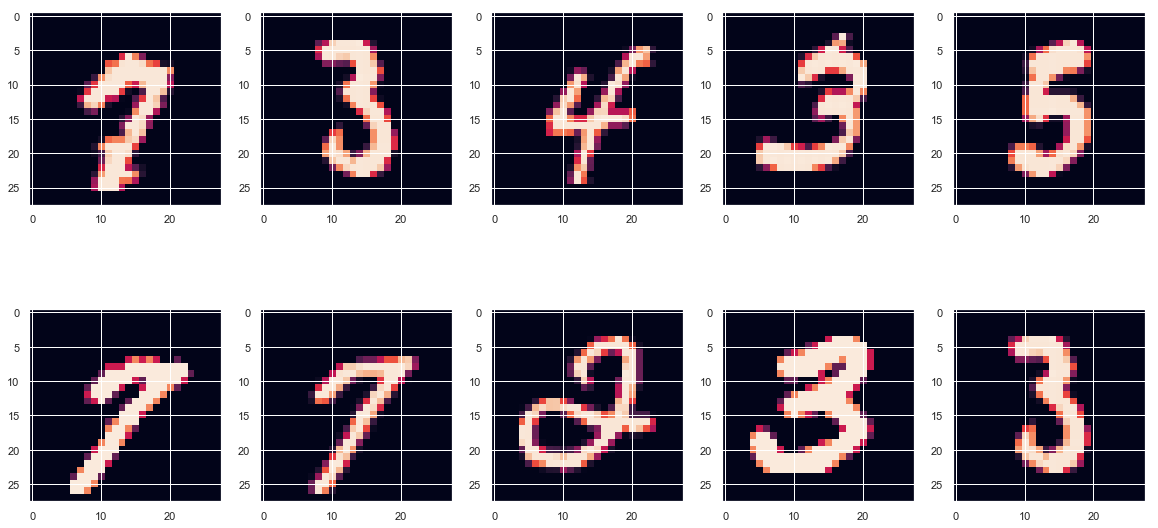

In [24]:
fig, axes = plt.subplots(2, 5, figsize = (20, 10))
for i in range(10):
    axes.flatten()[i].imshow(data[np.random.randint(0, data.shape[0])])
plt.show()